![Image](./img/dataset-diagram-logo.png)


**objectif** : pandas like but for **ndim**

In [2]:
import numpy as np
import pandas as pd
import xarray as xr

In [3]:
truc = xr.DataArray(np.random.randint(2, 3))
truc

<xarray.DataArray ()>
array(2)

In [4]:
data = xr.DataArray(np.random.randint(6, size=(2, 3)), coords={'x': ['a', 'b']}, dims=('x', 'y'))
data

<xarray.DataArray (x: 2, y: 3)>
array([[3, 1, 2],
       [5, 0, 2]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

In [6]:
xr.DataArray(pd.Series(range(3), index=list('abc'), name='foo'))

<xarray.DataArray 'foo' (dim_0: 3)>
array([0, 1, 2])
Coordinates:
  * dim_0    (dim_0) object 'a' 'b' 'c'

## Attribute of DataArray

In [5]:
print('values : ', data.values)
print('dims : ', data.dims)
print('coords : ', data.coords)
print('attrs metadata', data.attrs)

values :  [[1 2 2]
 [2 4 5]]
dims :  ('x', 'y')
coords :  Coordinates:
  * x        (x) <U1 'a' 'b'
attrs metadata {}


## Indexing

### numpy like

In [7]:
data[:, :2]

<xarray.DataArray (x: 2, y: 2)>
array([[3, 1],
       [5, 0]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

### pandas like with loc[]

In [8]:
data.loc[['a', 'b'], :]

<xarray.DataArray (x: 2, y: 3)>
array([[3, 1, 2],
       [5, 0, 2]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

### with isel()

In [9]:
data.isel(y=[0, 2])

<xarray.DataArray (x: 2, y: 2)>
array([[3, 2],
       [5, 2]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

### with sel()

In [10]:
data.sel(x=['a'])

<xarray.DataArray (x: 1, y: 3)>
array([[3, 1, 2]])
Coordinates:
  * x        (x) <U1 'a'
Dimensions without coordinates: y

## Attributes (metadata) usefull for protting

In [11]:
data.attrs['long_name'] = 'random unseless stuff'
data.attrs['units'] = 'mV'
data

<xarray.DataArray (x: 2, y: 3)>
array([[3, 1, 2],
       [5, 0, 2]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y
Attributes:
    long_name:  random unseless stuff
    units:      mV

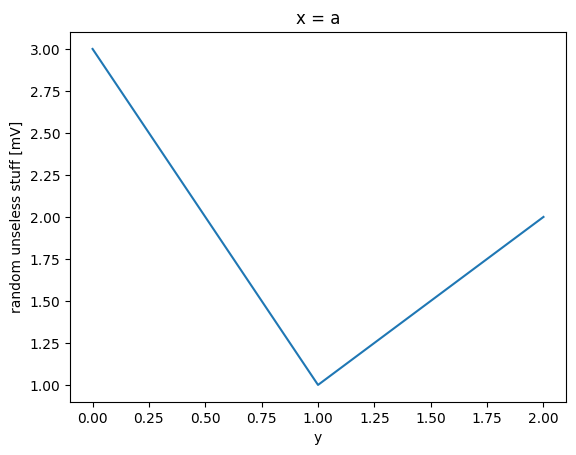

In [12]:
data.sel(x='a').plot()

## Computation / aggregation

In [13]:
# mais on peut utiliser les noms des axes au lieu de leur numéro
data.mean(dim='y')

<xarray.DataArray (x: 2)>
array([2.        , 2.33333333])
Coordinates:
  * x        (x) <U1 'a' 'b'

## GroupBy

In [14]:
data

<xarray.DataArray (x: 2, y: 3)>
array([[3, 1, 2],
       [5, 0, 2]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y
Attributes:
    long_name:  random unseless stuff
    units:      mV

In [15]:
labels = xr.DataArray(['E', 'F', 'E'], coords = [data.coords['y']], name='labels')
labels

<xarray.DataArray 'labels' (y: 3)>
array(['E', 'F', 'E'], dtype='<U1')
Coordinates:
  * y        (y) int64 0 1 2

In [16]:
data1 = data.groupby(labels).sum('y')
data1

<xarray.DataArray (x: 2, labels: 2)>
array([[5, 1],
       [7, 0]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * labels   (labels) object 'E' 'F'
Attributes:
    long_name:  random unseless stuff
    units:      mV

In [18]:
data2 = data.groupby(labels).apply(lambda x: x - x.min())
data2

<xarray.DataArray (x: 2, y: 3)>
array([[1, 1, 0],
       [3, 0, 0]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

## Pandas

In [20]:
series = data.to_series()
series

x  y
a  0    3
   1    1
   2    2
b  0    5
   1    0
   2    2
dtype: int64

In [21]:
series.to_xarray()

<xarray.DataArray (x: 2, y: 3)>
array([[3, 1, 2],
       [5, 0, 2]])
Coordinates:
  * x        (x) object 'a' 'b'
  * y        (y) int64 0 1 2

## Dataset = DataArray in the same place

In [22]:
times = np.arange(0, 10, 0.01)
freqs = np.arange(10, 50, 2.)

data1 = xr.DataArray(np.random.randn(times.size),
                     coords={'times': times},
                     dims=('times'))

data2 = xr.DataArray(np.random.randn(times.size, freqs.size),
                     coords={'times': times, 'freqs': freqs},
                     dims=('times', 'freqs'))



ds = xr.Dataset({'raw_signal': data1,
                 'time_freq' : data2,
                 'one_scalar': np.pi})
ds

<xarray.Dataset>
Dimensions:     (times: 1000, freqs: 20)
Coordinates:
  * times       (times) float64 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99
  * freqs       (freqs) float64 10.0 12.0 14.0 16.0 18.0 ... 42.0 44.0 46.0 48.0
Data variables:
    raw_signal  (times) float64 1.106 0.1282 0.2668 ... -0.2491 -0.2615 -0.844
    time_freq   (times, freqs) float64 -0.4597 1.021 0.4078 ... -0.4766 -1.512
    one_scalar  float64 3.142

In [23]:
ds['raw_signal']

<xarray.DataArray 'raw_signal' (times: 1000)>
array([ 1.10607422e+00,  1.28217327e-01,  2.66785183e-01,  8.66738401e-01,
        9.10260783e-01, -9.63996405e-01, -2.28513856e+00,  7.77869274e-01,
       -1.96779395e-01,  2.13548487e-01,  6.86695805e-01, -1.40457830e+00,
       -4.72231697e-01,  9.96480646e-01,  1.43265594e+00,  3.59373102e-01,
        9.42938791e-01,  7.95648856e-01,  1.18569073e+00,  2.73705206e-01,
       -9.55859595e-01, -5.22328060e-02,  1.50386159e-01,  4.73617897e-01,
       -8.48212261e-01, -2.00962558e-01,  2.24114620e+00, -1.07281114e+00,
       -6.63883280e-01,  7.90073824e-01,  7.40337729e-01, -1.26679554e+00,
        1.25043116e+00, -1.74644889e+00, -6.11190700e-01,  1.22114076e+00,
       -4.09469197e-01, -3.80979098e-01, -7.35800614e-01,  5.98841063e-01,
       -9.23543311e-01,  2.01048534e-01,  1.99416218e+00, -1.55739734e-01,
       -8.29702085e-01,  1.74037004e+00,  7.17833861e-01,  4.00504699e-01,
        1.83987161e-01, -2.28124669e-01,  8.02269640e-01,  7.47010799e-01,
       -5.90578264e-01, -1.27642538e+00,  7.09495789e-01, -8.82112238e-01,
        1.09841703e+00, -1.89562946e-01, -5.12457754e-01,  2.54151826e-01,
       -2.85666538e-01,  5.69467111e-01, -4.65204431e-01, -1.37259316e+00,
        6.73832690e-01, -5.76268965e-02,  3.85618827e-01, -5.24473305e-01,
        7.00943013e-01,  5.39001414e-01, -3.85901636e-01,  5.08193326e-01,
        9.21692840e-01, -1.01217693e+00, -7.67136663e-04,  1.01359587e+00,
       -5.31469593e-01, -1.17023585e+00, -1.65885808e+00,  6.35918273e-01,
...
        8.72152329e-01,  6.88425282e-01,  8.77164409e-01,  1.28776738e+00,
       -1.12022574e-01,  7.93861065e-01,  2.08491556e+00, -3.24739979e-01,
        1.33440722e-01, -1.85256273e+00,  1.56595694e+00, -1.28493754e-01,
        9.45730079e-01,  2.91868283e-01,  7.19007865e-01, -7.14107897e-01,
        3.90191507e-01,  1.04577784e+00,  1.96513777e+00,  3.83842862e-01,
        1.15670709e+00, -3.88910561e-01, -4.27075838e-01,  1.37888979e+00,
       -1.31538686e+00,  6.94929928e-01,  1.08543480e-01, -2.35129623e-01,
       -5.98571374e-01, -1.78236400e-01, -3.29987121e-01, -9.42388715e-01,
       -1.28278071e-01,  2.01637663e+00,  6.93338898e-01,  1.45716357e+00,
       -1.68636519e+00, -1.35307467e+00, -1.54131933e+00, -7.71855204e-02,
        6.17558296e-01,  3.07016440e-01,  3.15408929e-01,  1.92751804e-01,
       -3.98318329e-01,  3.03570341e-01, -1.73117572e+00, -6.33591050e-02,
        3.22206552e-01, -9.08610861e-01,  1.64801967e+00,  8.81527094e-01,
       -5.28599485e-01, -7.14987956e-01, -6.51897483e-01,  2.05479337e-01,
       -6.28444403e-01, -6.89597042e-01, -1.08747211e+00, -1.90275756e+00,
       -5.34981499e-01,  1.28147146e-01, -1.20339599e+00, -1.30385444e+00,
       -1.04270354e+00, -1.98238065e-01,  1.73244004e+00,  3.76710165e-01,
        1.05338579e+00,  1.18255385e+00, -1.48121981e+00,  6.30408694e-01,
        1.63472215e+00,  1.00514815e-01,  5.44472210e-01,  1.43549204e+00,
       -2.33340835e-01, -2.49119632e-01, -2.61471136e-01, -8.44044444e-01])
Coordinates:
  * times    (times) float64 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99

In [25]:
ds.isel(times=slice(0,100))

<xarray.Dataset>
Dimensions:     (times: 100, freqs: 20)
Coordinates:
  * times       (times) float64 0.0 0.01 0.02 0.03 0.04 ... 0.96 0.97 0.98 0.99
  * freqs       (freqs) float64 10.0 12.0 14.0 16.0 18.0 ... 42.0 44.0 46.0 48.0
Data variables:
    raw_signal  (times) float64 1.106 0.1282 0.2668 ... -0.7812 0.3763 -0.2287
    time_freq   (times, freqs) float64 -0.4597 1.021 0.4078 ... 0.3822 0.4783
    one_scalar  float64 3.142

## NetCDF (xarray format based on HDF5)

In [26]:
ds.to_netcdf('example.nc')

In [27]:
xr.open_dataset('example.nc')

<xarray.Dataset>
Dimensions:     (times: 1000, freqs: 20)
Coordinates:
  * times       (times) float64 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99
  * freqs       (freqs) float64 10.0 12.0 14.0 16.0 18.0 ... 42.0 44.0 46.0 48.0
Data variables:
    time_freq   (times, freqs) float64 ...
    raw_signal  (times) float64 ...
    one_scalar  float64 ...

## zarr (xarray format based on zarr)

In [28]:
ds.to_zarr('example.zarr')

In [29]:
xr.open_dataset('example.zarr')

/home/samuel/.virtualenvs/py3.10/lib/python3.10/site-packages/xarray/backends/plugins.py:139: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


<xarray.Dataset>
Dimensions:     (freqs: 20, times: 1000)
Coordinates:
  * freqs       (freqs) float64 10.0 12.0 14.0 16.0 18.0 ... 42.0 44.0 46.0 48.0
  * times       (times) float64 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99
Data variables:
    one_scalar  float64 ...
    raw_signal  (times) float64 ...
    time_freq   (times, freqs) float64 ...

## Exercice 1

 * Explorer le dossier `data/data_folder`
 * Créer un DataSet/DataArray pour organiser les datas de manieres multi dimensionel
 
 Chaque tableau `*.npy` a pour shape `(4, 3)`
 On peut considerer ces dimenssion comme `(trial, question)` avec trial de 0 à 4 and question 'a', 'b', 'c'

## Solution 1

In [32]:
!ls -r data/data_folder/*

data/data_folder/UJ03:
session_5.npy  session_4.npy  session_3.npy  session_2.npy  session_1.npy

data/data_folder/ST01:
session_5.npy  session_4.npy  session_3.npy  session_2.npy  session_1.npy

data/data_folder/LM04:
session_5.npy  session_4.npy  session_3.npy  session_2.npy  session_1.npy

data/data_folder/HJ02:
session_5.npy  session_4.npy  session_3.npy  session_2.npy  session_1.npy


In [33]:
from pathlib import Path
folder = Path('data/data_folder')

subjects = [f.stem for f in folder.iterdir()]
subjects

sessions = [int(f.stem.replace('session_', '')) for f in (folder / subjects[0]).iterdir()]
sessions = sorted(sessions)
sessions
# mydata = {}
# for file_path in folder.glob('**/*.npy'):
#     subject = file_path.parents[0].stem
#     session = int(file_path.stem.replace('session_', ''))
#     if subject not in mydata:
#         mydata[subject] = {}
#     arr = np.load(file_path)
# mydata


['LM04', 'ST01', 'UJ03', 'HJ02']

In [34]:
coords = {
    'subjects' : subjects,
    'sessions' : sessions,
    'trial' : np.arange(4),
    'questions' : np.array(['a', 'b', 'c'])
}
data = xr.DataArray(coords=coords, dims=['subjects', 'sessions', 'trial','questions'])
data



<xarray.DataArray (subjects: 4, sessions: 5, trial: 4, questions: 3)>
array([[[[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

...

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]]]])
Coordinates:
  * subjects   (subjects) <U4 'LM04' 'ST01' 'UJ03' 'HJ02'
  * sessions   (sessions) int64 1 2 3 4 5
  * trial      (trial) int64 0 1 2 3
  * questions  (questions) <U1 'a' 'b' 'c'

In [35]:
for subject in subjects:
    for session in sessions:
        file_path = folder / subject / f'session_{session}.npy'
        np_arr = np.load(file_path)
        data.loc[subject, session, :, :] = np_arr

data

<xarray.DataArray (subjects: 4, sessions: 5, trial: 4, questions: 3)>
array([[[[-0.38437686, -0.06271837, -0.82084786],
         [-0.79739786,  0.83418151,  0.07146799],
         [ 0.13707849,  0.11063433,  0.2016983 ],
         [-0.57891268, -0.52524443,  0.329934  ]],

        [[ 0.72770224,  1.12386998,  1.16356675],
         [ 1.15305513,  0.36136859, -1.22096704],
         [ 0.52472131, -0.9703159 , -0.58245406],
         [ 0.62051694,  1.71951811, -1.44501606]],

        [[-0.35249814,  0.5895377 , -0.66634582],
         [ 0.32521291, -1.4074326 ,  0.83472463],
         [-1.23893676, -0.13928455,  0.54966689],
         [ 0.99065481,  0.68066323, -0.7676674 ]],

        [[-0.62435599, -0.58404729,  1.11186882],
         [ 1.3928259 ,  0.45811526,  1.94850676],
         [-0.7660031 , -0.1861138 ,  0.8726239 ],
         [ 0.5886938 ,  1.3347231 , -0.85882485]],

...

        [[-1.29806685,  0.03022072, -1.37587918],
         [ 0.57163766,  1.03226634,  0.37189735],
         [-0.7952975 , -0.34279625,  0.37093617],
         [ 0.44633999, -0.44482825,  1.13871228]],

        [[-1.48598199, -1.45692286,  1.90019572],
         [-1.31145154, -0.11440697, -1.83359649],
         [ 1.27752558,  0.3734068 , -0.55602085],
         [-1.55311024,  0.93572405,  1.326925  ]],

        [[-1.56899284,  1.10091972, -1.04331003],
         [-1.20840134, -0.17228726,  1.34375573],
         [ 0.1379342 , -1.13626238,  0.22276613],
         [ 0.42508644,  0.58950312,  0.35705745]],

        [[-1.7347265 ,  1.90726086,  0.26651993],
         [ 0.85703526, -0.04849984, -1.05552666],
         [-0.5676066 , -0.89587758,  0.89477329],
         [ 0.10703574, -1.32986214,  1.85436898]]]])
Coordinates:
  * subjects   (subjects) <U4 'LM04' 'ST01' 'UJ03' 'HJ02'
  * sessions   (sessions) int64 1 2 3 4 5
  * trial      (trial) int64 0 1 2 3
  * questions  (questions) <U1 'a' 'b' 'c'

In [36]:
ds = xr.Dataset()
ds['data'] = data
ds.to_netcdf('mydata.nc')

In [37]:
ds = xr.open_dataset('mydata.nc')
ds['data']

<xarray.DataArray 'data' (subjects: 4, sessions: 5, trial: 4, questions: 3)>
[240 values with dtype=float64]
Coordinates:
  * sessions   (sessions) int32 1 2 3 4 5
  * subjects   (subjects) object 'LM04' 'ST01' 'UJ03' 'HJ02'
  * trial      (trial) int32 0 1 2 3
  * questions  (questions) object 'a' 'b' 'c'

In [42]:
ds['data'].sel(subjects='LM04').sel(sessions=2)

<xarray.DataArray 'data' (trial: 4, questions: 3)>
[12 values with dtype=float64]
Coordinates:
    sessions   int32 2
    subjects   <U4 'LM04'
  * trial      (trial) int32 0 1 2 3
  * questions  (questions) object 'a' 'b' 'c'